# 01. Data loading and exploration analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud, STOPWORDS

In [2]:
plt.style.use('ggplot')
sns.set_palette("viridis")

## 1. Загрузка данных

In [5]:
data_path = os.path.join('..', 'sample_data', 'sample_inquiries.csv')

try:
    df = pd.read_csv(data_path)
    print(f"Датасет успешно загружен из {data_path}")
    print(f"Размер датасета: {df.shape[0]} строк и {df.shape[1]} столбцов.")
except FileNotFoundError:
    print(f"Error: Файл не найден по пути {data_path}")
   
    df = pd.DataFrame(columns=['text', 'category']) 
    print("Создан пустой DataFrame для продолжения работы ноутбука.")


Датасет успешно загружен из ..\sample_data\sample_inquiries.csv
Размер датасета: 98 строк и 2 столбцов.


## 2. Initial data review

In [6]:
print("First 5 columns:")
print(df.head())
print("\nDataFrame:")
df.info()

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

if not df.empty:
    print("\nDescriptive statistics (for text columns):")
    print(df.describe(include=['object']))
else:
    print("\nDatafraim is empty, the descriptive statistics cannot be retrieved.")

if 'category' in df.columns and not df.empty:
    print("\nDistribution by category:")
    category_counts = df['category'].value_counts()
    print(category_counts)
else:
    print("\nСтолбец 'category' отсутствует")
    category_counts = pd.Series(dtype='int64')


First 5 columns:
                                                text              category
0  Здравствуйте, как я могу получить адресную спр...   Запрос на госуслугу
1  Почему портал электронного правительства посто...  Техническая проблема
2  Выражаю благодарность сотруднику ЦОНа №3 город...     Предложение/Отзыв
3  Не могу записаться на прием в поликлинику чере...  Техническая проблема
4  Какие документы необходимы для регистрации рож...   Запрос на госуслугу

DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      98 non-null     object
 1   category  98 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB

Number of missing values in each column:
text        0
category    0
dtype: int64

Descriptive statistics (for text columns):
                                                     text             category
count                

## 3. Explanatory data analysis.

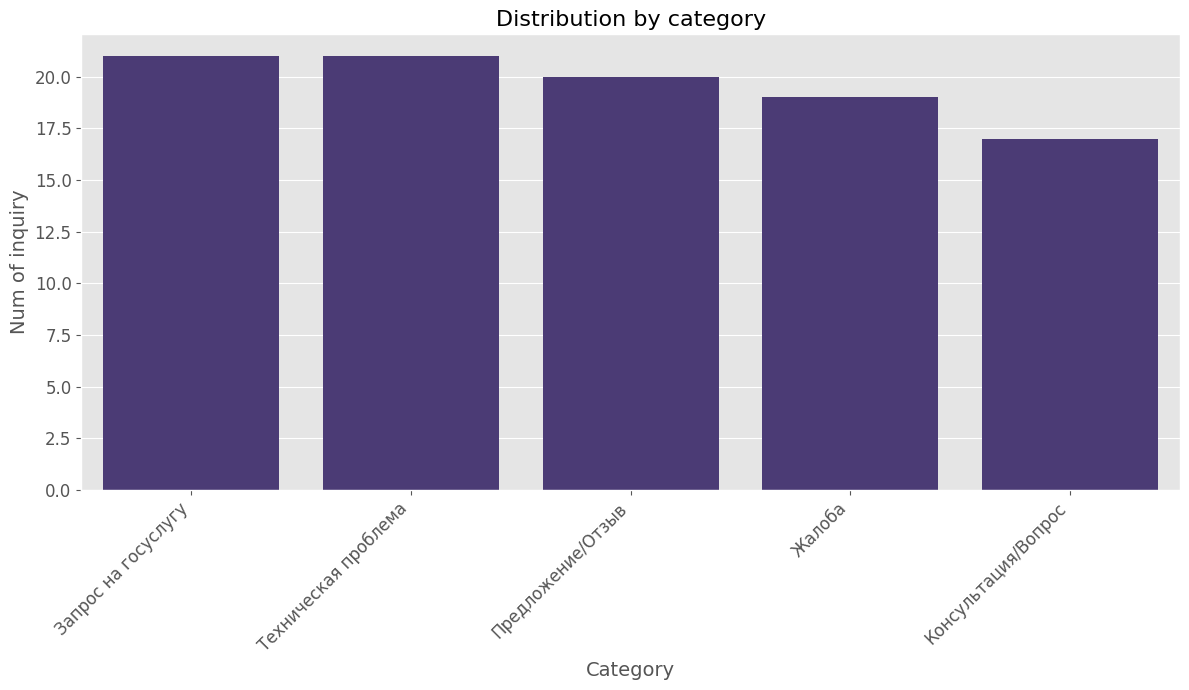

In [7]:
if not category_counts.empty:
    plt.figure(figsize=(12, 7))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title('Distribution by category', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Num of inquiry', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No data")

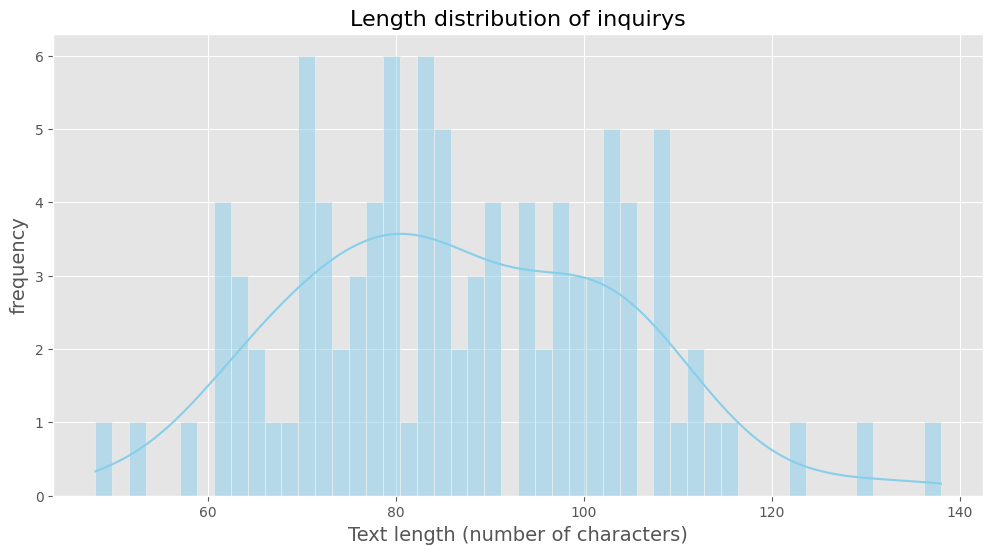


Text length statistics:
count     98.000000
mean      86.887755
std       17.331149
min       48.000000
25%       74.000000
50%       84.500000
75%      100.750000
max      138.000000
Name: text_length, dtype: float64


C:\Users\Agonia\AppData\Local\Temp\ipykernel_15716\4224776020.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='text_length', data=df, palette="viridis_r")


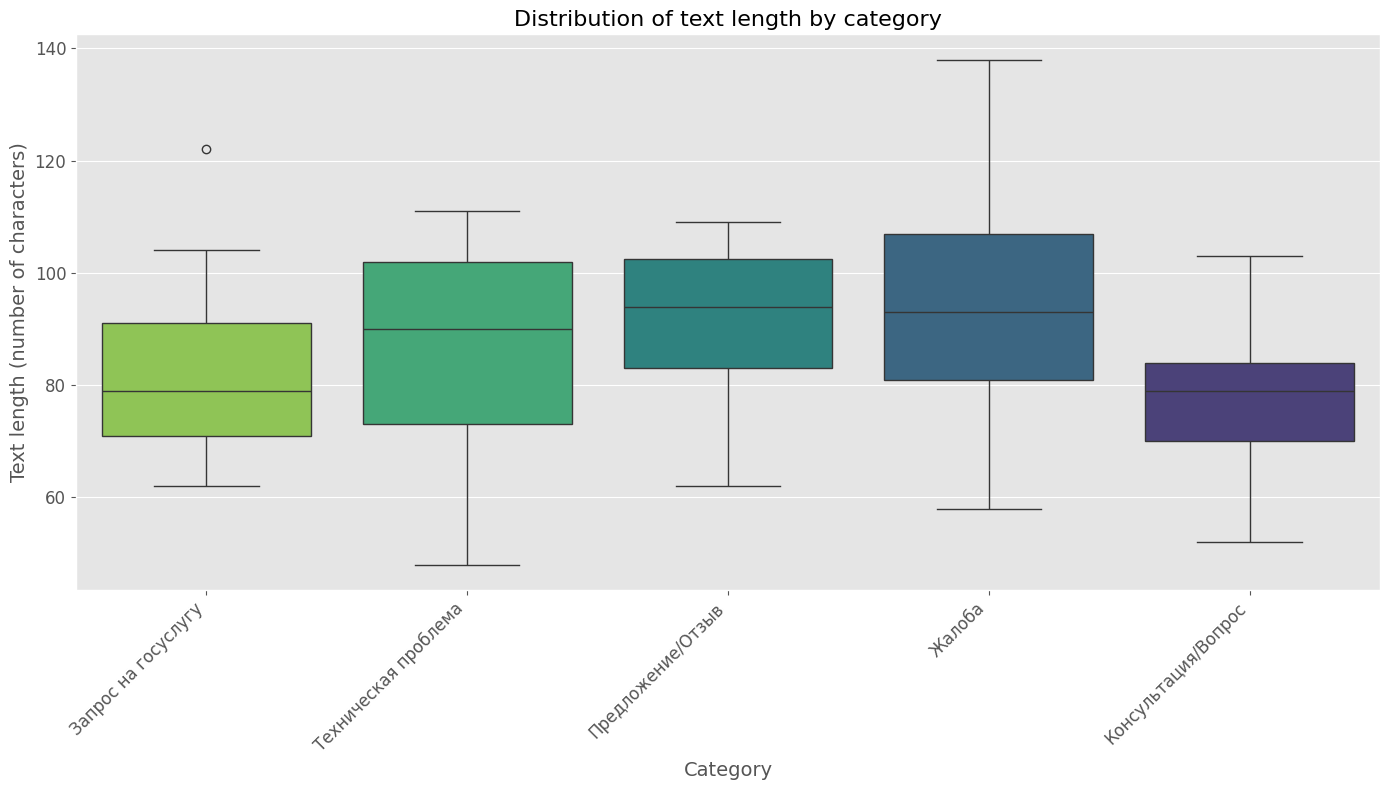

In [8]:
if 'text' in df.columns and not df.empty:
    df['text_length'] = df['text'].astype(str).apply(len) # Преобразуем в str на всякий случай
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
    plt.title('Length distribution of inquirys', fontsize=16)
    plt.xlabel('Text length (number of characters)', fontsize=14)
    plt.ylabel('frequency', fontsize=14)
    plt.show()

    print("\nText length statistics:")
    print(df['text_length'].describe())

    # Длина текста по категориям
    if 'category' in df.columns:
        plt.figure(figsize=(14, 8))
        sns.boxplot(x='category', y='text_length', data=df, palette="viridis_r")
        plt.title('Distribution of text length by category', fontsize=16)
        plt.xlabel('Category', fontsize=14)
        plt.ylabel('Text length (number of characters)', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()
else:
    print("Столбец 'text' отсутствует или датафрейм пуст")

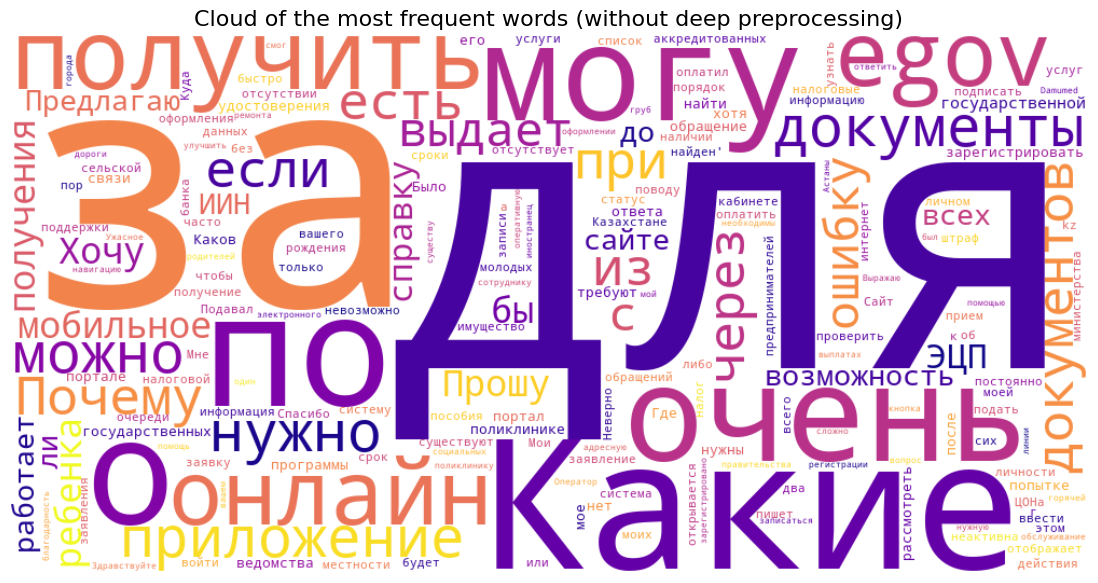

In [9]:
if 'text' in df.columns and not df.empty:
    all_text = " ".join(str(text_item) for text_item in df['text'].dropna())

    if all_text.strip(): 
        stopwords_wc = set(STOPWORDS)
        russian_stopwords = ["и", "в", "на", "не", "я", "быть", "что", "он", "она", "это", "как", "то", "все", "мы"] 
        stopwords_wc.update(russian_stopwords)

        wordcloud = WordCloud(
            stopwords=stopwords_wc,
            background_color="white",
            width=1000,
            height=500,
            colormap="plasma",
            collocations=False # Избежать генерации биграмм по умолчанию
        ).generate(all_text)

        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title('Cloud of the most frequent words (without deep preprocessing)', fontsize=16)
        plt.show()
    else:
        print("No text data for word cloud generation.")
else:
    print("генерация облака слов невозможна.")
